In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

In [3]:
#Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
# Value Count
data['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [5]:
data['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [6]:
data['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [7]:
#Crearing column accordind to problem statement
data['tax_income'] = data['Taxable.Income'].apply(lambda x : 'Risky' if x<=30000 else 'Good')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [8]:
#Drop 'Taxable.Income' column
data1 = data.drop('Taxable.Income' , axis = 1)
data1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [9]:
#Rename the column name
data1 = data1.rename({'Undergrad':'ug' , 'Marital.Status':'marital_status','City.Population':'city_popu',
                      'Work.Experience':'work_ex','Urban':'urban'} , axis = 1)
data1.head()

,ug,marital_status,city_popu,work_ex,urban,tax_income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [10]:
data1['tax_income'].value_counts()

Good     476
Risky    124
Name: tax_income, dtype: int64

### Compairing different columns w.r.t  'y'

In [11]:
def plot_rate_bar(data,col1,col2):
    
    data_col1 = data.groupby([col1])[col2].value_counts(normalize = True).unstack().reset_index()

    fig, axes = plt.subplots(1, 2 ,figsize= (18,4))
    (ax1,ax2) = axes
    colors = ['#768dc5','#e28743']
    ax1.bar(data_col1[col1], data_col1['Risky'], label = 'Risky', color= colors[0])
    ax1.bar(data_col1[col1], data_col1['Good'], label = 'Good',bottom= data_col1['Risky'], color= colors[1])
    ax1.set_title('comparision', fontsize= 15)
    ax1.set_xlabel(xlabel= col1, fontsize= 10)
    ax1.set_ylabel(ylabel= col2, fontsize= 10)
    ax1.tick_params(axis='both', labelsize=10)
    ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)
    ax1.legend()

    # Let's put the annotations inside the bars

    for rect in ax1.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is also not pixels, it's the
        label_text = '{:.2f}'.format(height)

        label_x = x + width / 2
        label_y = y + height / 2
        ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize= 8)
        
    sns.countplot(x=col1, data=data,hue=col2 , ax = ax2)
    plt.xticks( rotation = 45, fontsize = 12)

In [12]:
data1.head()

,ug,marital_status,city_popu,work_ex,urban,tax_income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


C:\Users\ayush\AppData\Local\Temp/ipykernel_944/2812184900.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


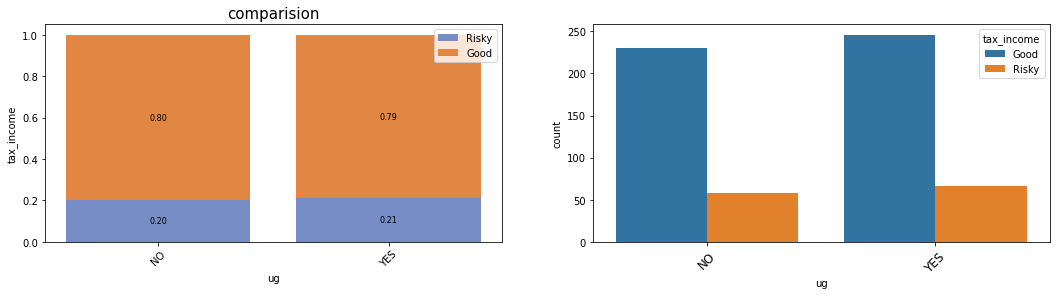

In [13]:
#compairing ug with tax_income
plot_rate_bar(data1,'ug','tax_income')

C:\Users\ayush\AppData\Local\Temp/ipykernel_944/2812184900.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


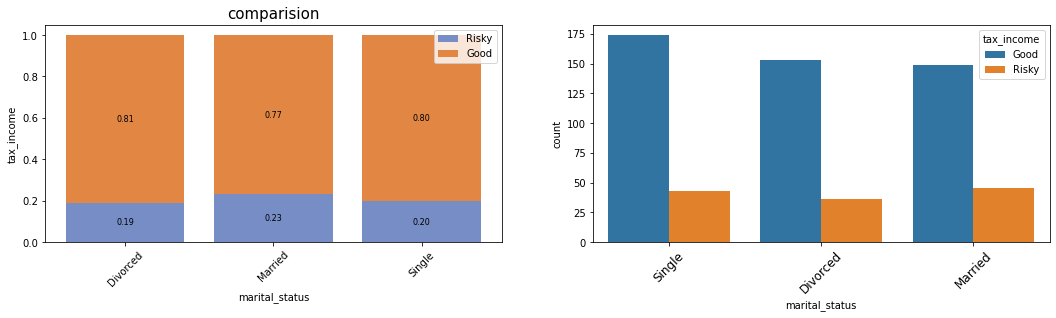

In [14]:
#compairing marital_status with tax_income
plot_rate_bar(data1,'marital_status','tax_income')

C:\Users\ayush\AppData\Local\Temp/ipykernel_944/2812184900.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(data_col1[col1]) , rotation=45)


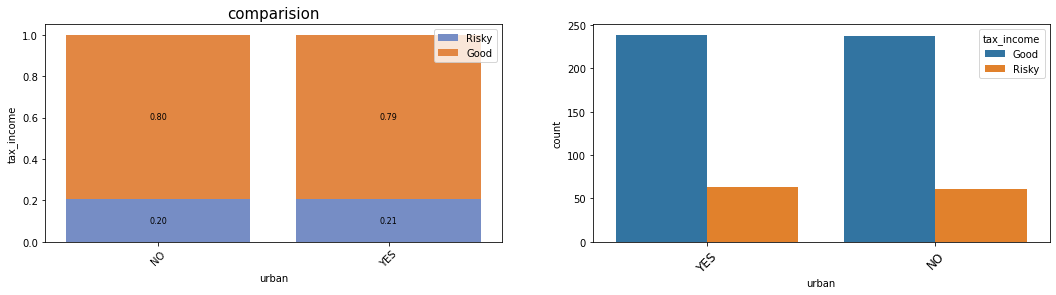

In [15]:
#compairing urban with tax_income
plot_rate_bar(data1,'urban','tax_income')

## Model Building

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report , accuracy_score , f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [17]:
data1.head()

,ug,marital_status,city_popu,work_ex,urban,tax_income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [18]:
# Scaling the dataset
scale = np.array(data1['city_popu']).reshape(-1, 1)
scaler = MinMaxScaler(feature_range = (0,1))
data1['city_popu'] = scaler.fit_transform(scale)

scale = np.array(data1['work_ex']).reshape(-1, 1)
data1['work_ex'] = scaler.fit_transform(scale)

data1.head()

,ug,marital_status,city_popu,work_ex,urban,tax_income
0,NO,Single,0.139472,0.333333,YES,Good
1,YES,Divorced,0.622394,0.600000,YES,Good
2,NO,Married,0.772568,1.000000,YES,Good
3,YES,Single,0.962563,0.500000,YES,Good
4,NO,Married,0.010081,0.933333,NO,Good


In [19]:
# Encoding the dataset using Label Encoder
le = LabelEncoder()

data1.iloc[:,0] = le.fit_transform(data1.iloc[:,0])
data1.iloc[:,1] = le.fit_transform(data1.iloc[:,1])
data1.iloc[:,4] = le.fit_transform(data1.iloc[:,4])
data1.iloc[:,5] = le.fit_transform(data1.iloc[:,5])

data1.head()

,ug,marital_status,city_popu,work_ex,urban,tax_income
0,0,2,0.139472,0.333333,1,0
1,1,0,0.622394,0.600000,1,0
2,0,1,0.772568,1.000000,1,0
3,1,2,0.962563,0.500000,1,0
4,0,1,0.010081,0.933333,0,0


In [20]:
#Dividing into X and y
X = data1.iloc[:, 0:-1]
y = data1.iloc[:,-1]

In [21]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,stratify = y, random_state = 42)

In [22]:
# Building Decision Tree
model = DecisionTreeClassifier(criterion = 'entropy' , class_weight = {0:0.25 , 1:0.75} ,max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, criterion='entropy',
                       max_depth=4)

In [23]:
#PLot the decision tree
# plt.figure(figsize = (20,10))
# tree.plot_tree(model);

In [24]:
data1.head()

,ug,marital_status,city_popu,work_ex,urban,tax_income
0,0,2,0.139472,0.333333,1,0
1,1,0,0.622394,0.600000,1,0
2,0,1,0.772568,1.000000,1,0
3,1,2,0.962563,0.500000,1,0
4,0,1,0.010081,0.933333,0,0


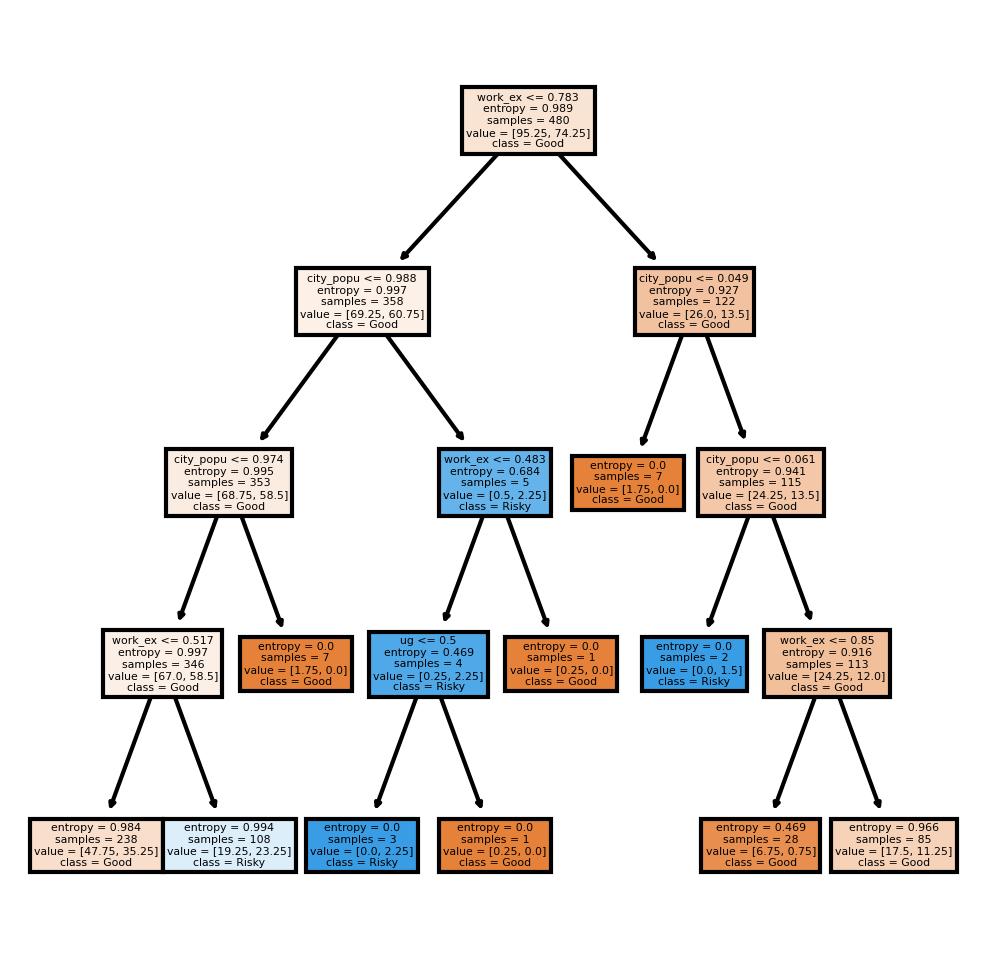

In [25]:
fn = list(X.columns)
cn=['Good' , 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names=cn, filled = True);

In [26]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [27]:
print(classification_report(y_train , y_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       381
           1       0.32      0.36      0.34        99

    accuracy                           0.71       480
   macro avg       0.57      0.58      0.58       480
weighted avg       0.72      0.71      0.72       480



In [28]:
print(classification_report(y_test , y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        95
           1       0.25      0.24      0.24        25

    accuracy                           0.69       120
   macro avg       0.53      0.53      0.53       120
weighted avg       0.69      0.69      0.69       120



In [29]:
print(f'Train score {accuracy_score(y_train_predict,y_train)}')
print(f'Test score {accuracy_score(y_test_predict,y_test)}')
print(f'Train f1-score {f1_score(y_train_predict,y_train)}')
print(f'Test f1-score {f1_score(y_test_predict,y_test)}')

Train score 0.7083333333333334
Test score 0.6916666666666667
Train f1-score 0.339622641509434
Test f1-score 0.24489795918367346


### Pre pruning techniques on our Model

In [30]:
params = {'criterion':['entropy','gini'] ,'max_depth': [2,4,6,8,10,12], 'min_samples_split': [2,3,4], 'min_samples_leaf': [1,2]}

model_test = DecisionTreeClassifier(class_weight = {0:0.25 , 1:0.75})
gcv = GridSearchCV(estimator=model_test,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [31]:
print(gcv.best_score_)
print(gcv.best_estimator_)
print(gcv.best_params_)

0.7229166666666667
DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, criterion='entropy',
                       max_depth=2)
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [32]:
model1 = gcv.best_estimator_
model1.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

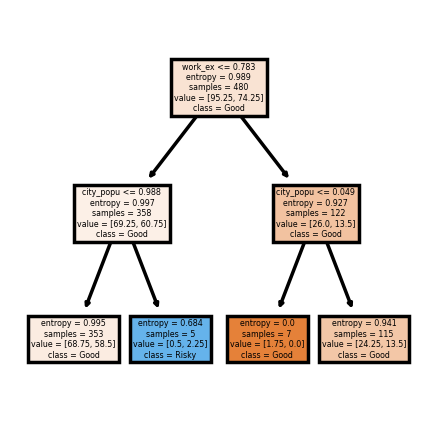

In [33]:
fn = list(X.columns)
cn=['Good' , 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=250)
tree.plot_tree(model1, feature_names = fn, class_names=cn, filled = True);

In [34]:
print(f'Train score {accuracy_score(y_train_predict,y_train)}')
print(f'Test score {accuracy_score(y_test_predict,y_test)}')

Train score 0.7083333333333334
Test score 0.6916666666666667


### Post pruning techniques on our Model

In [35]:
model_test = DecisionTreeClassifier(class_weight = {0:0.25 , 1:0.75})

In [36]:
path = model_test.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas , '\n' , impurities)

[0.         0.00126422 0.00126422 0.00126422 0.00126422 0.00126422
 0.00132743 0.00136147 0.00138274 0.00174376 0.00176991 0.00186306
 0.00189633 0.00189633 0.00221239 0.00221239 0.00221239 0.00221239
 0.00233395 0.00241352 0.00242309 0.00252845 0.00252845 0.00252845
 0.00252845 0.00252845 0.00265487 0.00265487 0.00278761 0.0028445
 0.00289622 0.00301182 0.00320415 0.00332168 0.00339667 0.00347661
 0.00347661 0.00353982 0.00358933 0.00368732 0.00368732 0.00381126
 0.0038214  0.00387557 0.0039823  0.00419691 0.00442079 0.00476352
 0.00523183 0.00530973 0.00535067 0.00563332] 
 [0.         0.00252845 0.00505689 0.00758534 0.01011378 0.01264223
 0.01529709 0.01802003 0.02078552 0.03299181 0.03653163 0.04584695
 0.04774329 0.04963962 0.05185201 0.0540644  0.05627679 0.05848918
 0.06082313 0.06565016 0.07291944 0.07797633 0.08303322 0.08556166
 0.08809011 0.09061855 0.09327342 0.09592829 0.10150351 0.10434801
 0.10724423 0.11025605 0.1198685  0.12983355 0.16380023 0.17075346
 0.17770668 0.1

In [37]:
# For each alpha we will append our model to a list
test_model = []
for ccp_alpha in ccp_alphas:
    model_test = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model_test.fit(X_train, y_train)
    test_model.append(model_test)

In [38]:
test_model[:5]

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0012642225031605566, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0012642225031605566, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0012642225031605566, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0012642225031605566, random_state=0)]

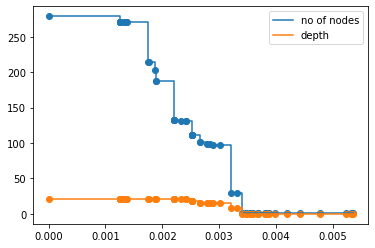

In [39]:
test_model = test_model[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [model_test.tree_.node_count for model_test in test_model]
depth = [model_test.tree_.max_depth for model_test in test_model]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

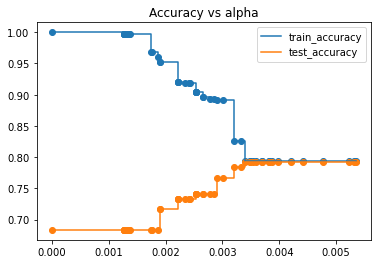

In [40]:
#plot for training and testing accuracy
train_acc = []
test_acc = []
for c in test_model:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
    
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [41]:
model2 = DecisionTreeClassifier(random_state=0,ccp_alpha=0.0033)
model2.fit(X_train,y_train)
y_train_predict = model2.predict(X_train)
y_test_predict = model2.predict(X_test)

print(f'Train score {accuracy_score(y_train_predict,y_train)}')
print(f'Test score {accuracy_score(y_test_predict,y_test)}')

Train score 0.825
Test score 0.7833333333333333


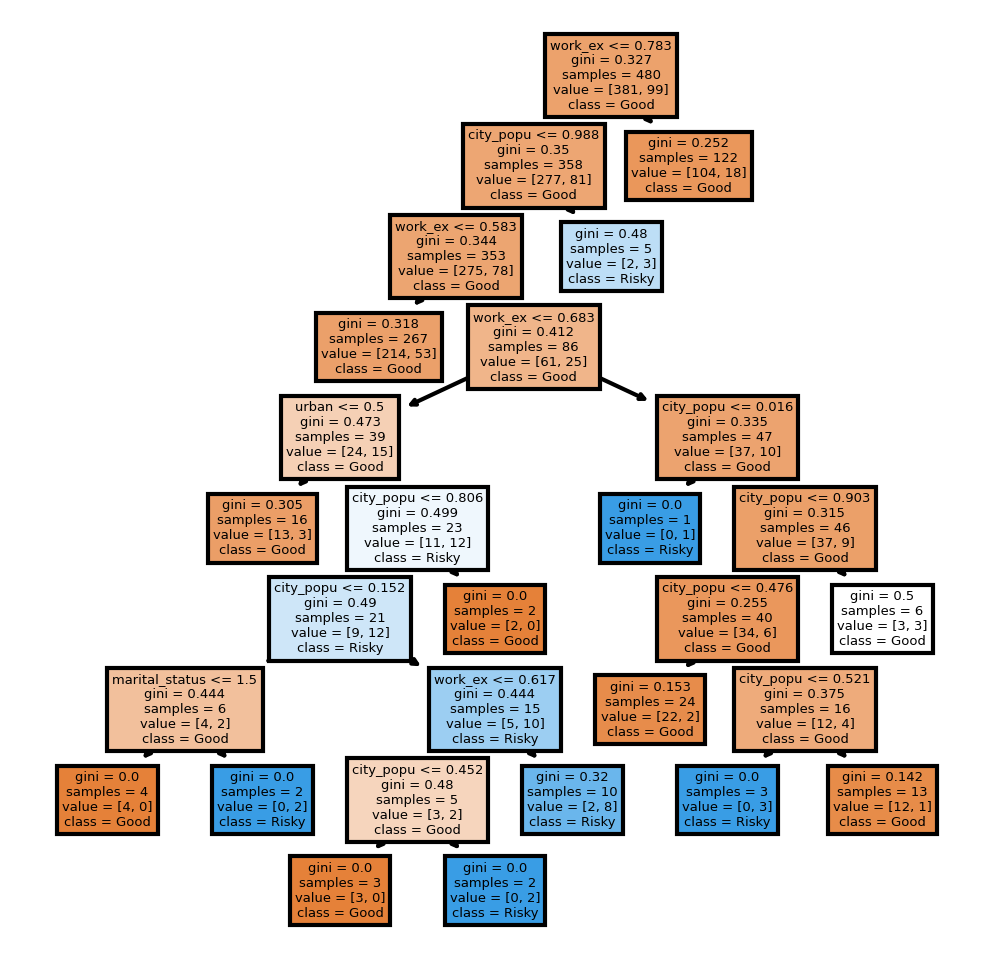

In [42]:
fn = list(X.columns)
cn=['Good' , 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2, feature_names = fn, class_names=cn, filled = True);

## Final model

In [43]:
y_train.value_counts()

0    381
1     99
Name: tax_income, dtype: int64

In [44]:
final_model = DecisionTreeClassifier(criterion = 'entropy' ,max_depth=2 ,class_weight = {0:0.25 , 1:0.75} ,
                                     random_state=1,ccp_alpha=0.0033)
final_model.fit(X_train , y_train)

y_train_predict = final_model.predict(X_train)
y_test_predict = final_model.predict(X_test)

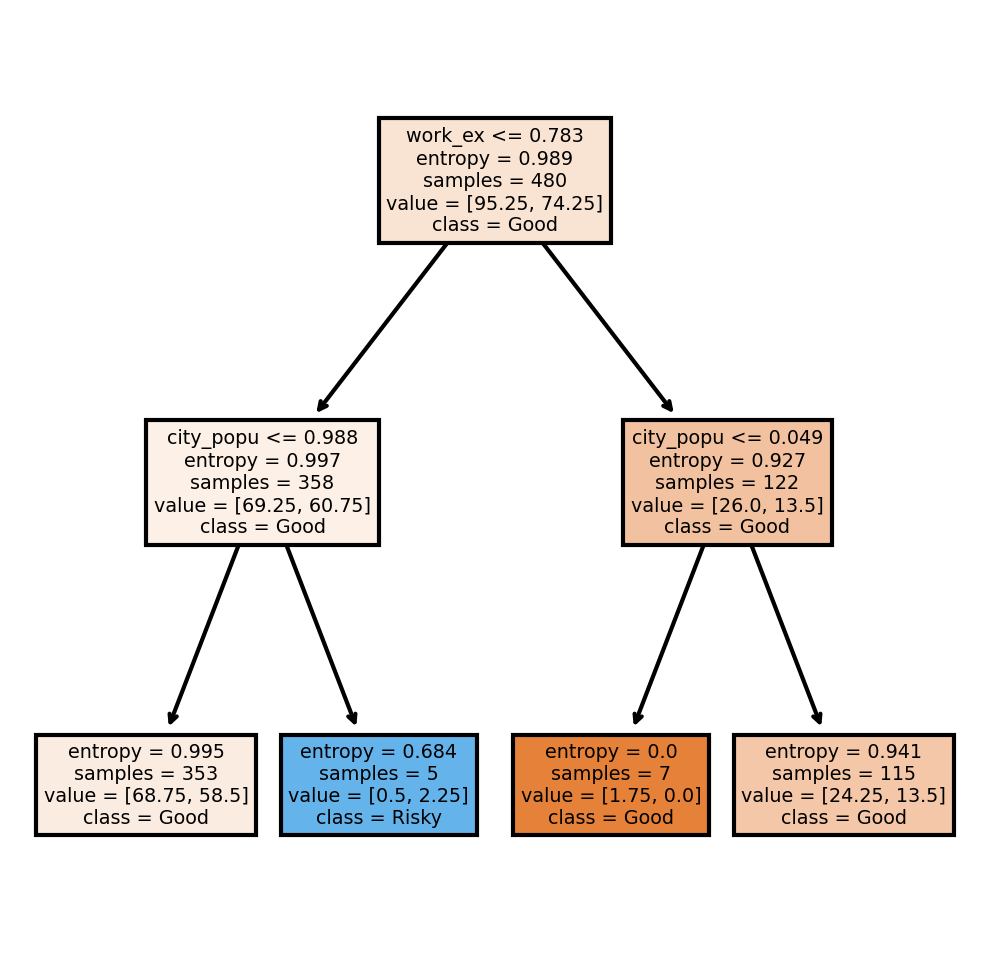

In [45]:
fn = list(X.columns)
cn=['Good' , 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(final_model, feature_names = fn, class_names=cn, filled = True);

In [46]:
print(f'Train score {accuracy_score(y_train_predict,y_train)}')
print(f'Test score {accuracy_score(y_test_predict,y_test)}')

Train score 0.7958333333333333
Test score 0.7916666666666666
